### Notes and Code for book "Bayesian Methods for Hackers" - by Cameron Davidson-Pilon

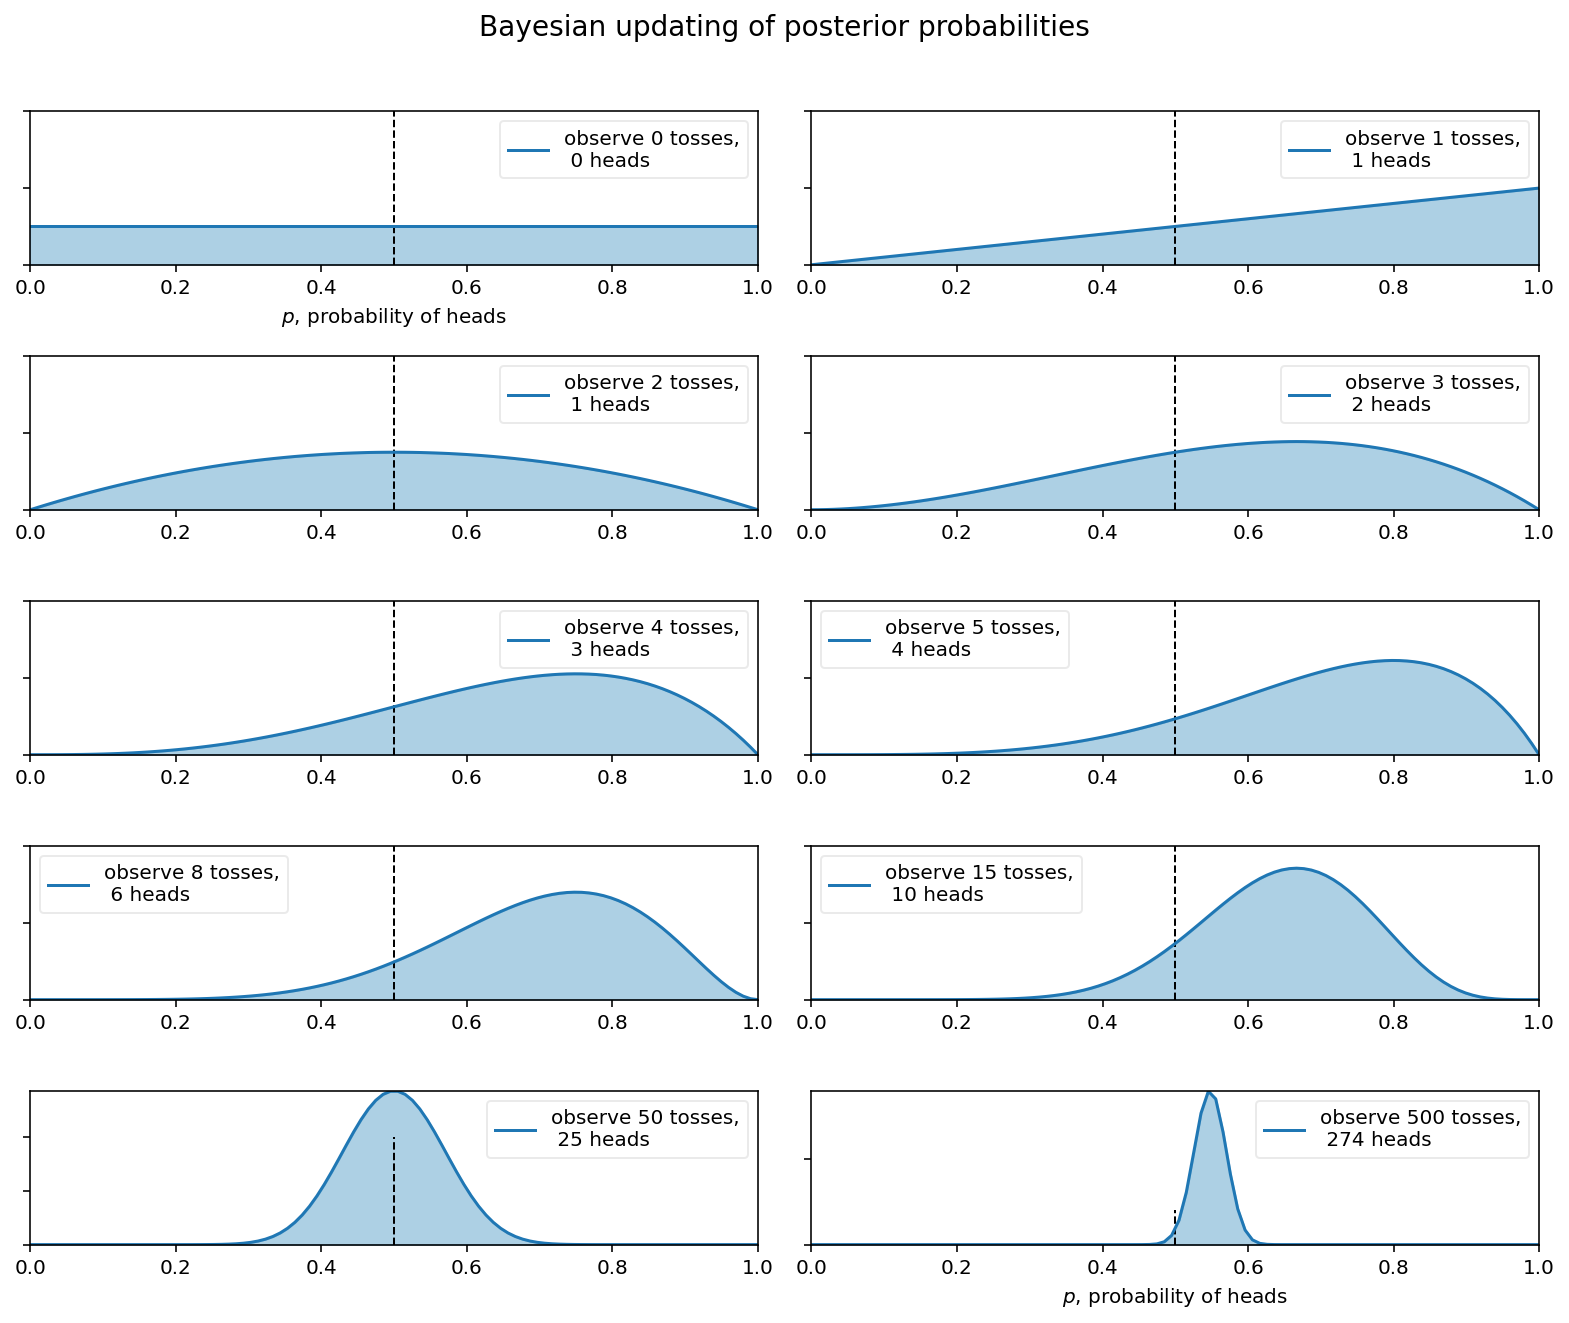

In [8]:
"""
The book uses a custom matplotlibrc file, which provides the unique styles for
matplotlib plots. If executing this book, and you wish to use the book's
styling, provided are two options:
    1. Overwrite your own matplotlibrc file with the rc-file provided in the
       book's styles/ dir. See http://matplotlib.org/users/customizing.html
    2. Also in the styles is  bmh_matplotlibrc.json file. This can be used to
       update the styles in only this notebook. Try running the following code:

        import json, matplotlib
        s = json.load( open("../styles/bmh_matplotlibrc.json") )
        matplotlib.rcParams.update(s)

"""

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

# using beta functions as distributions
dist = stats.beta 

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]

# initialize data array as 500 zeros and ones
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])

x = np.linspace(0, 1, 100)

# subplot 3 parameters: nrows, ncols, index (1,2,3,...)
nrows = int(len(n_trials) / 2)
ncols = 2

# using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(nrows, ncols, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)

    heads = data[:N].sum()
    # beta distribution: stats.beta.pdf(x, successes, failures)
    y = dist.pdf(x, 1 + heads, 1 + N - heads) 

    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()